In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import json

root='logs'

def getconf(run): 
    with open(os.path.join(root,r,'config.json')) as f:
        return json.load(f)

In [2]:
runs_=os.listdir(root)

runs=dict()
for r in runs_:
    try:
        runs[r]=getconf(r)['notes']
        print(r,runs[r])
    except:
        print('skipping '+r)
        
runs=dict(sorted(runs.items(),key=lambda a:a[1]))

0819-092726 ProxSR, lr=0.01
0819-090819 ProxSR, lr=0.1
0819-092253 ProxSR, lr=1.0
skipping .DS_Store
0819-092137 kfac, lr=-1.0
skipping .ipynb_checkpoints
0819-093228 ProxSR mnist lr=0.2


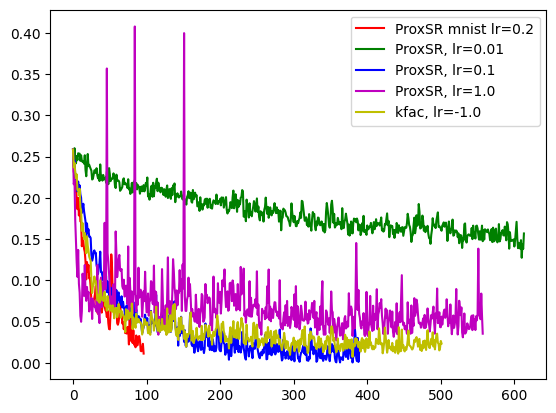

In [3]:
def smooth(y,k=10):
    s=np.ones((k,))/k
    return np.convolve(y,s,mode='valid')

def getenergies(run):
    with open(os.path.join(root,run,'loss.txt'),'r') as f:
        return np.array([float(l) for l in f])
    
colors=['r','g','b','m','y','c','orange','brown']*2
alphas=[1]*10
linestyles=['-']*10

for (r,n),c,ls,a in zip(runs.items(),colors,linestyles,alphas):
    try:
        plt.plot(smooth(getenergies(r),k=1),label=n,color=c,ls=ls,alpha=a)
    except Exception as e:
        print(e)
        print('skip',r,n)
    
plt.legend()